In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

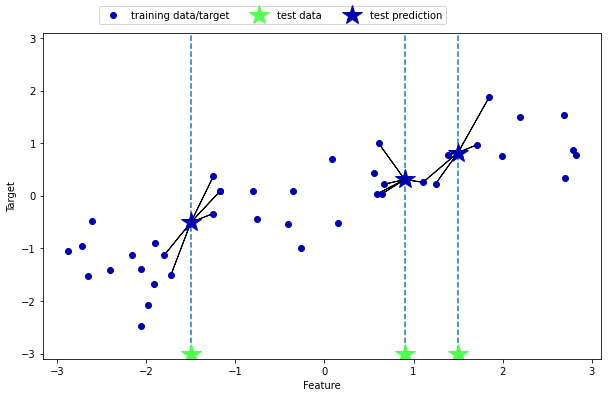

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x,y = mglearn.datasets.make_wave(n_samples=40)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print(train_score, test_score) # 과적합 => 모델을 단순화..

0.8585617204962638 0.2453288040322017


In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print(train_score, test_score) 

0.7052388550839183 0.7865206873840339


In [12]:
test_score_list = []
train_score_list = []

for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)
    train_score_list.append(train_score)
    
    test_score = knn.score(x_test, y_test)
    test_score_list.append(test_score)

    print('K :',k, 'train_score :', train_score, 'test_scpre :', test_score)

K : 1 train_score : 1.0 test_scpre : 0.05589727892197305
K : 2 train_score : 0.8801081102074234 test_scpre : 0.0701364693826011
K : 3 train_score : 0.8585617204962638 test_scpre : 0.2453288040322017
K : 4 train_score : 0.8618038637526048 test_scpre : 0.2875566296991019
K : 5 train_score : 0.8624252951207979 test_scpre : 0.4220214091337652
K : 6 train_score : 0.8245828607125973 test_scpre : 0.567108757160166
K : 7 train_score : 0.7936441345783886 test_scpre : 0.6697359894167373
K : 8 train_score : 0.7599916240813328 test_scpre : 0.7054623142847276
K : 9 train_score : 0.7122211055302146 test_scpre : 0.78769101934609
K : 10 train_score : 0.7052388550839183 test_scpre : 0.7865206873840339
K : 11 train_score : 0.7000470614288212 test_scpre : 0.8157262205538992
K : 12 train_score : 0.6702506793446364 test_scpre : 0.8444064308873191
K : 13 train_score : 0.6401056956717159 test_scpre : 0.7898611657442082
K : 14 train_score : 0.6150999464847111 test_scpre : 0.8095372764147899
K : 15 train_score

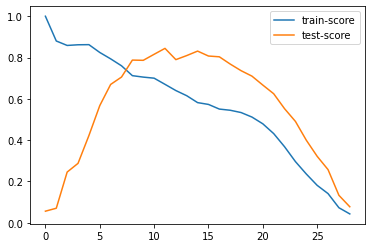

In [13]:
plt.plot(train_score_list, label='train-score')
plt.plot(test_score_list, label='test-score')
plt.legend()
plt.show()

In [17]:
import warnings

warnings.filterwarnings(action='ignore')

In [18]:

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

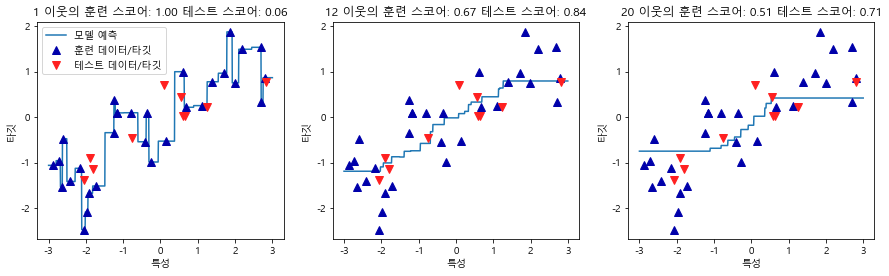

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 12, 20], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")